# Data Visualisation

Heel veel informatie over hoe je visualisatie kan doen met behulp van matplotlib kan je vinden op deze website: https://www.python-graph-gallery.com/.
Specifiek voor pandas vind je ook op [deze](https://pandas.pydata.org/pandas-docs/stable/visualization.html) pagina veel informatie.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Relative to reference point

### Bar diverging

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red']


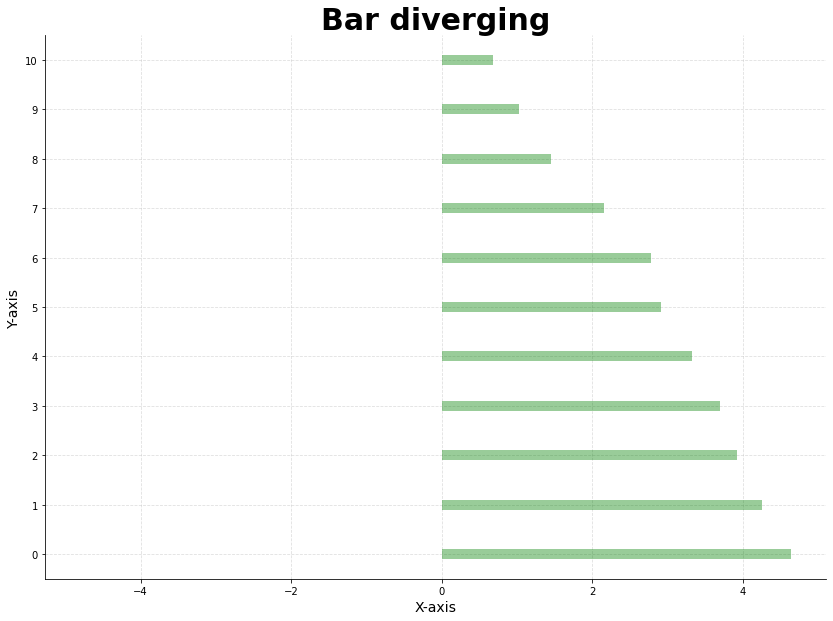

In [39]:
#aanmaken van data
np.random.seed(0)
df = pd.DataFrame({"data": np.random.random(size=20) * 10 -5})
df.sort_values("data", inplace=True, ascending=False)
# reset index want de index is mee gesorteerd waardoor bij het plotten eigenlijk de sort gaan undo-en
df.reset_index(inplace=True)
#df = df.reset_index()

df

plt.figure(figsize=(14,10))

colors = ['red' if x < 0 else 'green' for x in df.data]
print(colors)
plt.hlines(y=df.index, xmin=0, xmax=df.data,
          color=colors,
          linewidth = 10,
          alpha = 0.4)

#plt.title("Bar diverging",fontsize = 30)
plt.title("Bar diverging",fontdict={"size":30, "weight":"bold"})
plt.gca().set_xlabel("X-axis", fontsize=14)
plt.gca().set_ylabel("Y-axis", fontsize=14)

# streepjes op de assen corrigeren (komma-getallen geen steek houden)
# 2 keer df.index omdat de eerste keer de waarde waar de tick is en de tweede keer het label
plt.yticks(df.index, df.index, fontsize=10)
#plt.xticks([])

plt.grid(linestyle="--", alpha=0.4)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().set_ylim(-0.5,10.5)
plt.savefig("test.png")

### Bar diverging stacked

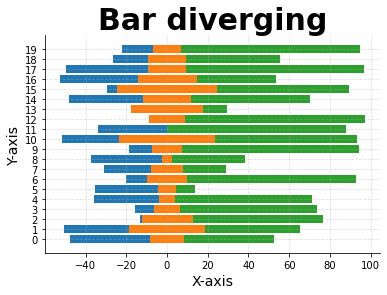

In [52]:
# data aanmaken
np.random.seed(0)
df = pd.DataFrame({"positive":np.random.randint(0,100, size=20),
                  "neutral": np.random.randint(0,50, size=20),
                  "negative": np.random.randint(0,50, size=20)})

# bij de negative nemen we de left waarden omdat ze negatief zijn. hierdoor wordt links en rechts omgedraaid.
plt.barh(df.index, -df.negative, left=-df.neutral/2)
plt.barh(df.index, df.neutral, left=-df.neutral/2)
plt.barh(df.index, df.positive, left=df.neutral/2)

#plt.title("Bar diverging",fontsize = 30)
plt.title("Bar diverging",fontdict={"size":30, "weight":"bold"})
plt.gca().set_xlabel("X-axis", fontsize=14)
plt.gca().set_ylabel("Y-axis", fontsize=14)

# streepjes op de assen corrigeren (komma-getallen geen steek houden)
# 2 keer df.index omdat de eerste keer de waarde waar de tick is en de tweede keer het label
plt.yticks(df.index, df.index, fontsize=10)
#plt.xticks([])

plt.grid(linestyle="--", alpha=0.4)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

### Line Surplus Deficit Filled

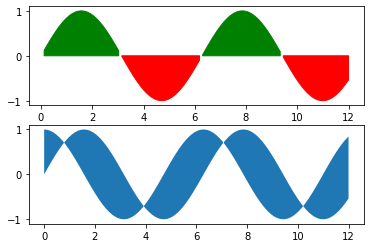

In [67]:
# x gaat van 0 tot 12 en er zijn 100 datapunten
df = pd.DataFrame({"x": np.linspace(0, 12, 100)})
# bereken de sinus voor alle x
df["sin"] = np.sin(df.x)
# bereken de cosinus voor alle x
df["cos"] = np.cos(df.x)

# 2 rijen van plots en 1 kolom
# dit geeft de figure terug en een tuple met alle axis terug
# deze splitsen we in ax1 (de bovenste) en ax2( de onderste)
fig, (ax1, ax2) = plt.subplots(2, 1)

w_pos = df.sin > 0
w_neg = df.sin < 0

ax1.fill_between(df.x, 0, df.sin, where=w_neg, color='red')
ax1.fill_between(df.x, 0, df.sin, where=w_pos, color='green')
ax2.fill_between(df.x, df.sin, df.cos)

## Verband tussen features

### Scatter plot

Reeds veel gedaan dus ga ik hier niet opnieuw tonen

### Line Column Plot

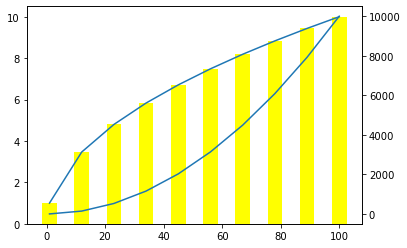

In [71]:
# bereken het kwadraat en de vierkantswortel
df = pd.DataFrame({"x": np.linspace(1, 100, 10)})
df["square"] = df.x * df.x
df["sqrt"] = np.sqrt(df.x)
df

# breedte van de bars is 5
plt.bar(df.x, df.sqrt, 5, color="yellow")
plt.plot(df.x, df.sqrt)
axisRight = plt.twinx()
axisRight.plot(df.x, df.square, label="Square")

### Connected scatter plot

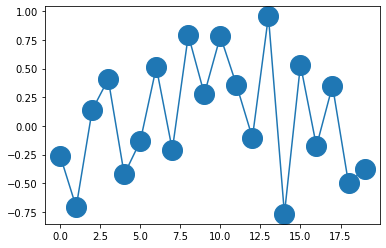

In [75]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1

plt.figure()  
# ofwel werk je met scatter om de datapunten aan te geven ofwel gebruik je markers in plot
#plt.scatter(df.x, df.y) # Tekent de dots
plt.plot(df.x, df.y, marker="o", markersize=20) # Connecteert de dots

### Bubble plot

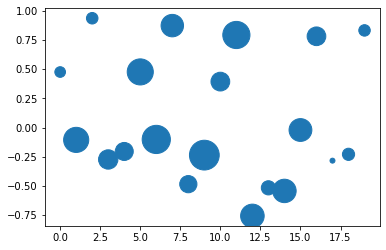

In [84]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df["size"] = np.random.random(size=20) * 1000

# dit werkt niet, s is voor alle punten
#plt.scatter(df.x, df.y, s = 200)
plt.scatter("x", "y", s="size", data=df)

### XY - heatmap

Dit hebben we ook reeds gedaan bij de correlatie matrices, die ga ik nu niet overdoen. Binnen maptlotlib kan dit met matshow. Seaborn heeft een alternatief dat [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) noemt.

## Plots voor verbanden met de tijd

### (Stacked) Area plot

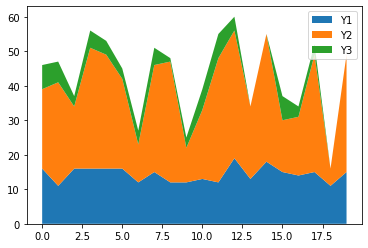

In [86]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.randint(10, 20, size=20)
df["y2"] = np.random.randint(5, 40, size=20)
df["y3"] = np.random.randint(0, 10, size=20)

plt.stackplot(df.x, df.y1, df.y2, df.y3, labels=['Y1','Y2','Y3'])
# dit is voor de legende
plt.legend(loc='upper right')

### Fan plot

Float64Index([0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
              0.30000000000000004],
             dtype='float64')
Float64Index([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
              0.6000000000000001],
             dtype='float64')
Float64Index([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002], dtype='float64')


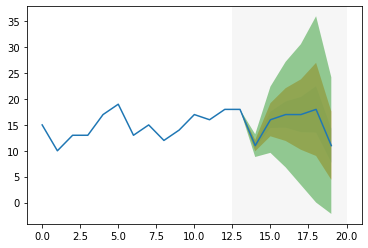

In [119]:
np.random.seed(0)
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.randint(10, 20, size=20)
# simplistische manier om de fout te berekenen
df["minus"] = df.y*0.9
df["positieve"] = df.y*1.1

#display(df)

# dit is de lijst met fouten die we willen
errors = [0.05, 0.1, 0.2]

# dit tekent de lijn
plt.plot(df.x, df.y)

# teken nu een fill_between voor elke fout in de lijst
for idx, value in enumerate(errors):
    # itereer tegelijkertijd over de idx en de value
    # dit geeft 
    # idx=0, value=0.05 de eerste keer
    # idx=1, value=0.1 de tweede iteratie
    # idx=2, value=0.2 de derde iteratie
    a = value*8
    x = df.x.loc[13:]
    # verander de error van iets dat gaat van 0 naar de uiteindelijke waarde wanneer idx = len(errors)-1
    value = value * (x.index - 13)
    print(value)
    err_min = df.y.loc[13:] * (1-value)
    err_max = df.y.loc[13:] * (1+value)
    plt.gca().fill_between(x, err_min, err_max, alpha=a)

#dit is een manier om het rode te gaan tekenen (vanaf 13 gekozen omdat het maar mag starten vanaf de grijze balk)
#plt.gca().fill_between(df.x.loc[13:], df.minus[13:], df.positieve[13:], color="red")

# dit gaat de grijze area gaan tekenen in de plot
plt.gca().axvspan(12.5,20, facecolor="lightgray", alpha=0.2)

### Circles Timeline Plot

Dit kan gegenereerd worden door middel van een scatter plot waar de x-as de tijd is (of een index), de y waarde is een constante (bijvoorbeeld 0) en de bubble size is dan de bijhorende waarde

Probeer dit zelf eens uit.

(0.0, 3.0)

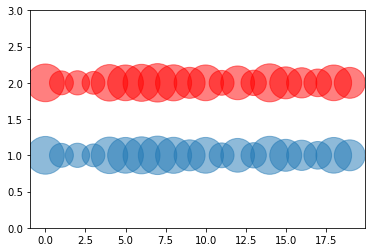

In [120]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.random(size=20) * 1000 +500
df["y2"] = np.random.random(size=20) * 2000 +0

plt.scatter("x", y=[1] * len(df.y1), s = "y1", alpha=0.5, data=df)
plt.scatter("x", y=[2] * len(df.y1), s = "y1", alpha=0.5, data=df, color="red")
plt.gca().set_ylim(0,3)

### Seismogram plot

Dit kan opnieuw gedaan worden op basis van de vorige voorbeelden. Zoals bij het Connected scatter plot er twee zaken geplot zijn op 1 figuur met dezelfde y-as moeten er hier twee lijn plots zijn. De ene bevat de exacte waarden en de andere een lijn dat de toppen van de golven verbindt. 

Het moeilijke is om de lokale maxima/minima te zoeken die verbonden moet worden. Dit kan eventueel zelf gedaan worden of je kan gebruik maken van een package die dit doet voor jou, bijvoorbeeld: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html of https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

## Sorteren / Volgorde van data

### Lollipop chart

https://www.python-graph-gallery.com/lollipop-plot/

<StemContainer object of 3 artists>

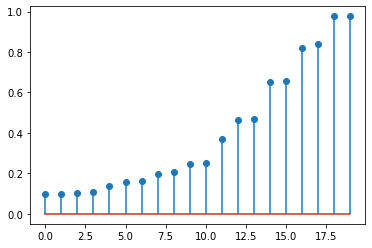

In [121]:
df = pd.DataFrame({'x':range(20), 'y':np.random.uniform(size=20) })
ordered_df = df.sort_values(by='y')
ordered_df.reset_index(inplace=True)

plt.stem(ordered_df['y'])


### Bump plot

Dit kan gedaan worden als connected scatter plot (1 per lijn). Je moet dan wel nog extra aandacht besteden aan de y-ticks die de startvolgorde van de verschillende lijnen bepaalt. Het maken van aparte ticks links en rechts voor het veranderen van de volgorde kan door gebruik te maken van de twinx functie (zie de line-column plot).